In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [3]:
n_classes = 3  # iris数据共3类
iris = load_iris()
iris.data[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [4]:
X = iris.data[:, [0, 1]]
y = iris.target

In [5]:
clf = DecisionTreeClassifier().fit(X, y)  # 训练好的决策数分类模型

In [6]:
# 网格空间
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), 
                     np.arange(y_min, y_max, 0.02))

关于`np.meshgrid`的细节，参考[知乎专栏](Numpy中Meshgrid函数介绍及2种应用场景 - lemon的文章 - 知乎
https://zhuanlan.zhihu.com/p/29663486)

Z.shape =>  (61600,)


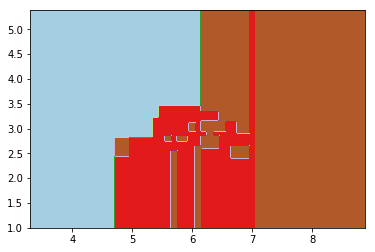

In [7]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
print("Z.shape => ", Z.shape)
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.show()

有关`plt.contour()`和`plt.contourf()`的解释见[脚本之家博客](http://www.jb51.net/article/130617.htm)。它们分别

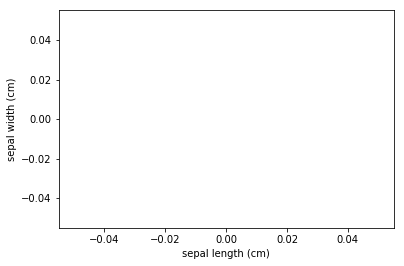

In [9]:
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.axis("tight")
plt.show()

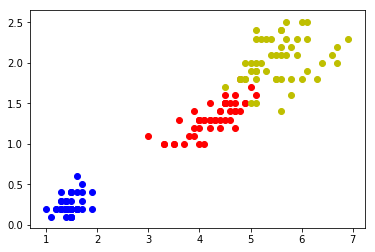

In [13]:
# Plot the training points
for i, color in zip(range(n_classes), 'bry'):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                cmap=plt.cm.Paired)

plt.axis("tight")
plt.show()

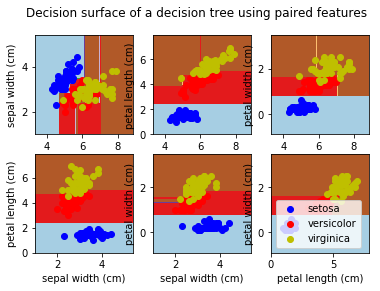

In [11]:
# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

## sklearn.tree.DecisionTreeClassifier

|参数|描述|
|--|:--|
|criterion|评价指标，默认是gini系数。{'gini', 'entropy'}。'entropy'表示信息增益
|splitter|划分节点的策略，默认是`best`。{'best', 'random'}
|max_depth|default=None
|min_samples_split|default=2
|min_samples_leaf|default=1
|min_weight_fraction_leaf|叶子节点最小比重（比重为与总样本的加权比值），默认为0
|max_features|使用的特征上限
|random_state|
|max_leaf_nodes|
|min_impurity_decrease|
|min_impurity_split|
|class_weight|
|presort|